In [11]:
import bamboolib as bam 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df0=pd.read_csv('C:/Users/Administrator/Desktop/winter/6040/KickstarterData.csv')

In [12]:
cleaned_column_names = (df0.columns
                        .str.strip()
                        .str.replace('((?<=[a-z0-9])[A-Z]|(?!^)[A-Z](?=[a-z]))', r'_\1')
                        .str.lower()
                        .str.replace('[ _-]+', '_')
                        .str.replace('[}{)(><.!?\\\\:;,-]', ''))
df0.columns = cleaned_column_names
df0[['deposit_amount']] = df0[['deposit_amount']].fillna(df0[['deposit_amount']].mode().iloc[0])
df0[['ice_cream_products_consumed_per_week']] = df0[['ice_cream_products_consumed_per_week']].fillna(df0[['ice_cream_products_consumed_per_week']].median())
df0[['household_income']] = df0[['household_income']].fillna(df0[['household_income']].mean())
df0[['household_income']] = df0[['household_income']].fillna(df0[['household_income']].mode().iloc[0])
df1 = df0.drop(columns=['donate_id'])
df1 = df1.drop(columns=['donate_date'])
df1

,donate_date,gender,deposit_amount,preferred_color_of_device,ice_cream_products_consumed_per_week,favorite_flavor_of_ice_cream,donated_to_kick_starter_before,household_income,do_you_own_a_keurig,how_many_desserts_do_you_eat_a_week
0,2019/7/1,female,100.0,white,4.0,vanilla,yes,<50K,yes,7
1,2019/7/1,female,100.0,blue,5.0,vanilla,yes,<50K,yes,5
2,2019/7/1,female,100.0,silver,6.0,vanilla,yes,<50K,yes,1
3,2019/7/1,female,100.0,silver,5.0,vanilla,yes,<50K,yes,4
4,2019/7/1,male,100.0,white,1.0,vanilla,yes,<50K,yes,7
...,...,...,...,...,...,...,...,...,...,...
9995,2019/7/9,male,100.0,black,4.0,chocolate,no,<100K,no,5
9996,2019/7/9,male,100.0,silver,6.0,no preference,yes,<100K,yes,6
9997,2019/7/9,male,100.0,blue,3.0,chocolate,yes,<100K,yes,5
9998,2019/7/9,male,100.0,blue,6.0,vanilla,no,<100K,no,5


array([[<AxesSubplot:title={'center':'deposit_amount'}>,
        <AxesSubplot:title={'center':'ice_cream_products_consumed_per_week'}>],
       [<AxesSubplot:title={'center':'how_many_desserts_do_you_eat_a_week'}>,
        <AxesSubplot:>]], dtype=object)

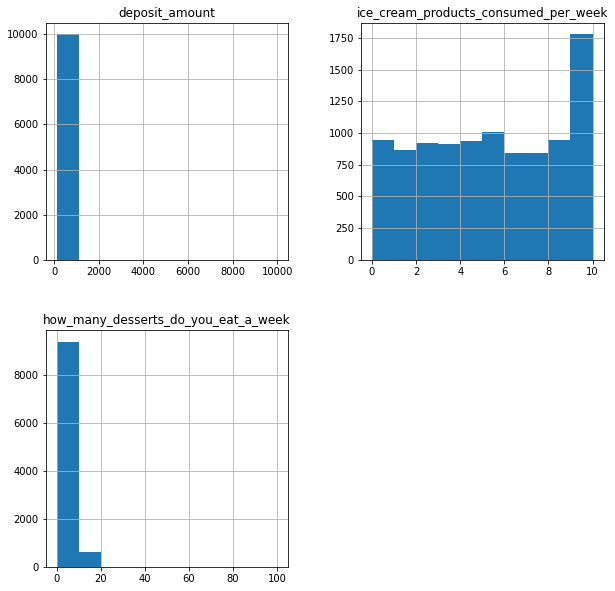

In [14]:
df1.hist(figsize=(10,10))

In [17]:
import plotly.express as px
fig = px.density_heatmap(df1, x='ice_cream_products_consumed_per_week', facet_col='donated_to_kick_starter_before', facet_row='gender', y='preferred_color_of_device')
fig

In [16]:
import plotly.express as px
fig = px.histogram(df1, x='household_income', y='deposit_amount', facet_col='gender', color='donated_to_kick_starter_before')
fig.update_layout(barmode='group')
fig